In [1]:
from typing import List, Dict

from oop_functions.experiment_helper import *
from oop_functions.experiment_runner import ExperimentRunner
from oop_functions.util_functions import *
from oop_functions.visualization_util import *
from oop_functions.analytics_cv_util import *
from oop_functions.analytics_utils import *

%matplotlib inline
import warnings

warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns

from xgboost import XGBClassifier

import itertools


In [2]:
filesuffixes = [
    '_for_experiment_participants_screened_single_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    '_for_experiment_participants_screened_ca125_single_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    '_for_experiment_participants_screened_ultra_single_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    '_for_experiment_participants_screened_cols_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_participants_screened_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    '_for_experiment_not_screened_cols_single_label_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_participants_screened_single_first_5_top_35_features_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_participants_screened_single_first_5_top_50_features_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_participants_screened_first_5_top_35_features_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_participants_screened_first_5_top_50_features_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_not_screened_cols_single_label_top_35_features_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_not_screened_cols_single_label_top_50_features_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_participants_screened_single_first_5_XGBClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_participants_screened_first_5_XGBClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_not_screened_cols_single_label_XGBClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_participants_screened_single_first_5_top_35_features_XGBClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_participants_screened_single_first_5_top_50_features_XGBClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_participants_screened_first_5_top_35_features_XGBClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_participants_screened_first_5_top_50_features_XGBClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_not_screened_cols_single_label_top_35_features_XGBClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_not_screened_cols_single_label_top_50_features_XGBClassifier_cancer_in_next_1_years__15_trials',
    ]

In [3]:
filesuffixes = [
    '_for_experiment_participants_screened_ca125_single_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    '_for_experiment_participants_screened_ultra_single_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    '_for_experiment_participants_screened_single_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    '_for_experiment_participants_screened_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    '_for_experiment_not_screened_cols_single_label_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    '_for_experiment_participants_screened_cols_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    '_for_experiment_participants_screened_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    '_for_experiment_not_screened_cols_single_label_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    '_for_experiment_participants_all_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    '_for_experiment_participants_screened_single_first_5_RandomForestClassifier_cancer_in_next_3_years__15_trials',
    '_for_experiment_participants_screened_single_first_5_RandomForestClassifier_cancer_in_next_5_years__15_trials',
    '_for_experiment_participants_screened_single_first_5_RandomForestClassifier_cancer_in_next_10_years__15_trials',
    '_for_experiment_participants_screened_single_first_5_RandomForestClassifier_ovar_cancer__15_trials',
    '_for_experiment_not_screened_cols_single_label_first_5_RandomForestClassifier_ovar_cancer__15_trials',
    '_for_experiment_not_screened_cols_single_label_RandomForestClassifier_ovar_cancer__15_trials',
    '_for_experiment_participants_all_RandomForestClassifier_ovar_cancer__15_trials',
    # TODO: either don't use these or make them single label
    # '_for_experiment_participants_screened_first_5_ca125_and_binary_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_participants_screened_first_5_ca125_binary_RandomForestClassifier_cancer_in_next_1_years__15_trials',
]

In [4]:
# filesuffixes = [
#     '_for_experiment_participants_screened_single_first_5_RandomForestClassifier_balanced_cancer_in_next_1_years__15_trials',
#     '_for_experiment_participants_screened_single_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials',
# ]

In [5]:
cv_analytics_utils = commonized_datasets(filesuffixes)

_for_experiment_participants_screened_ca125_single_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials
Added new records: 190
_for_experiment_participants_screened_ultra_single_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials
Added new records: 190
_for_experiment_participants_screened_single_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials
Added new records: 190
_for_experiment_participants_screened_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials
_for_experiment_not_screened_cols_single_label_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials
Added new records: 230
_for_experiment_participants_screened_cols_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials
_for_experiment_participants_screened_RandomForestClassifier_cancer_in_next_1_years__15_trials
_for_experiment_not_screened_cols_single_label_RandomForestClassifier_cancer_in_next_1_years__15_trials
Added new records: 1084
_for_experiment_part

X-axis -1 means that somewhere withing the next year person gets cancer. -2 means somewhere between year -1 and 0 person gets cancer.

While for patients who developed cancer, we alligned them by the year when they got cancer. So, what I did is that I looked at the people who got cancer within the first 5 years of the experiment and who got cancer within that period. I aligned them on the year they got cancer and calculated the average estimated probability of them getting cancer as predicted by model 1 year before actually getting cancer, 2 years before actually getting cancer and so on. This is what the result I got based on the dataset with questionnaire and screening data:

There is an interesting correlation, and we can see that the increase in the probability is non-linear. (I also included the standard deviation interval). On the other hand, the graph based on the same selection of individuals, but only using the questionnaire data, did not exhibit such characteristics:

For the individuals who did not develop cancer, they were alligned by the date of their last exam. Just to verify if there is no fluke, I tested this also on a general population and there is no correlation (they are just aligned based on the last observation)

In [6]:
def compare_cvs(cv_analytics_utils, filesuffixes, legend, filename=''):
    f, ax = plt.subplots(1, 2, figsize=(13, 5))
    visualization_util = VisualizationUtil()
    plt.yticks(rotation=0)
    for axis in ax:
        # Shrink current axis by 20%
        box = axis.get_position()
        axis.set_position([box.x0, box.y0, box.width * 0.9, box.height])

    for i, filesuffix in enumerate(filesuffixes):
        cv_analytics_util = cv_analytics_utils[filesuffix]
        visualization_util.display_roc_graph(ax[-2], *cv_analytics_util.roc_curve(), label=legend[i])
        # visualization_util.display_roc_threshold(ax[-2], *self.roc_with_interval())
        precision, recall, thresholds = cv_analytics_util.precision_recall()
        visualization_util.display_precision_recall(ax[-1], precision, recall, label=legend[i])
    if len(filename) > 0:
        plt.savefig(filename)
    plt.show()

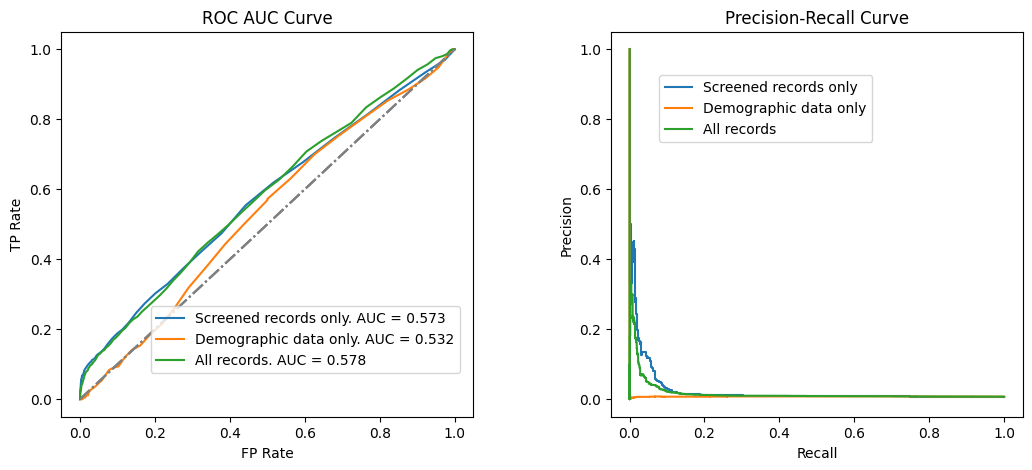

In [12]:
compare_cvs_filesuffixes = [
    '_for_experiment_participants_screened_single_first_5_RandomForestClassifier_ovar_cancer__15_trials',
    '_for_experiment_not_screened_cols_single_label_first_5_RandomForestClassifier_ovar_cancer__15_trials',
    '_for_experiment_participants_all_RandomForestClassifier_ovar_cancer__15_trials',
]
legend = [
    'Screened records only',
    'Demographic data only',
    'All records'
]

compare_cvs(cv_analytics_utils, compare_cvs_filesuffixes, legend, filename='./experiment_graphs/lifetime_predictions.png')

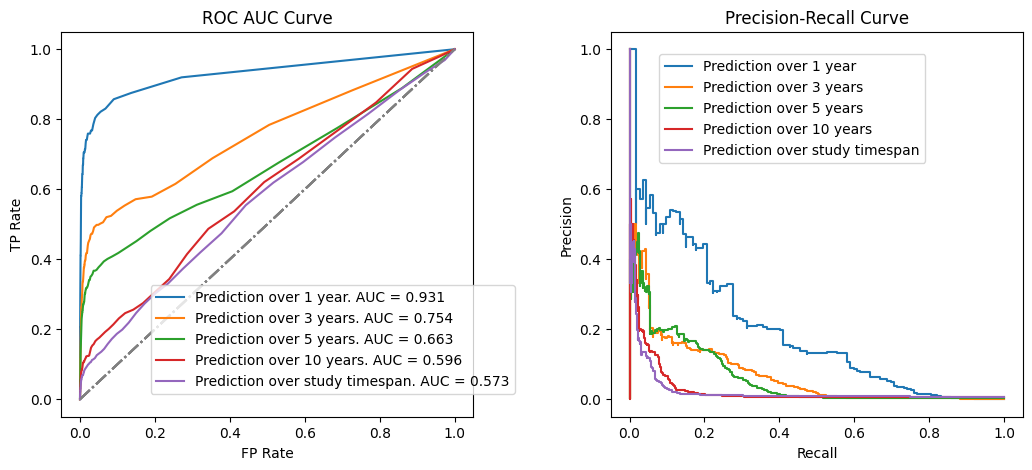

In [9]:
compare_cvs_filesuffixes = [
    '_for_experiment_participants_screened_single_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    '_for_experiment_participants_screened_single_first_5_RandomForestClassifier_cancer_in_next_3_years__15_trials',
    '_for_experiment_participants_screened_single_first_5_RandomForestClassifier_cancer_in_next_5_years__15_trials',
    '_for_experiment_participants_screened_single_first_5_RandomForestClassifier_cancer_in_next_10_years__15_trials',
    '_for_experiment_participants_screened_single_first_5_RandomForestClassifier_ovar_cancer__15_trials'
]
legend = [
    'Prediction over 1 year',
    'Prediction over 3 years',
    'Prediction over 5 years',
    'Prediction over 10 years',
    'Prediction over study timespan'
]

compare_cvs(cv_analytics_utils, compare_cvs_filesuffixes, legend, filename='./experiment_graphs/experiments_over_years.png')

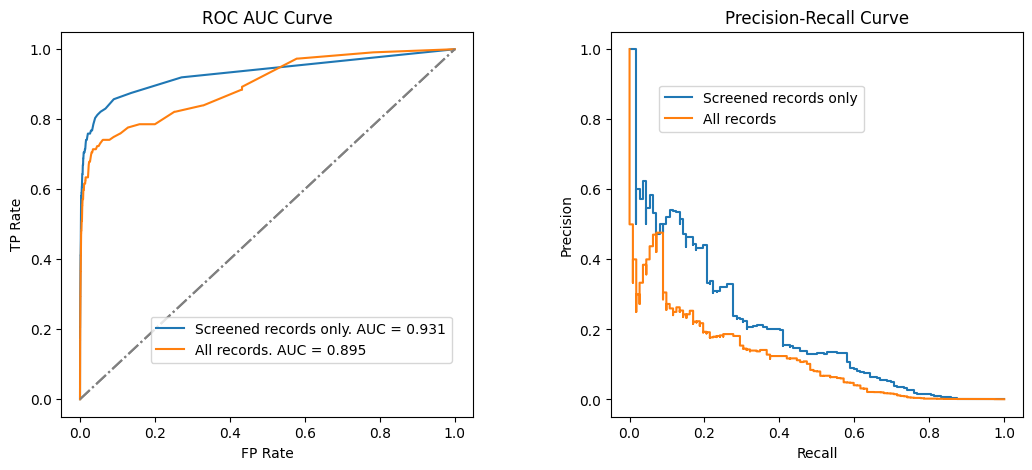

In [14]:
compare_cvs_filesuffixes = [
    '_for_experiment_participants_screened_single_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    '_for_experiment_participants_all_RandomForestClassifier_cancer_in_next_1_years__15_trials',
]
legend = [
    'Screened records only',
    'All records'
]

compare_cvs(cv_analytics_utils, compare_cvs_filesuffixes, legend, filename='./experiment_graphs/all_vs_screened_records.png')

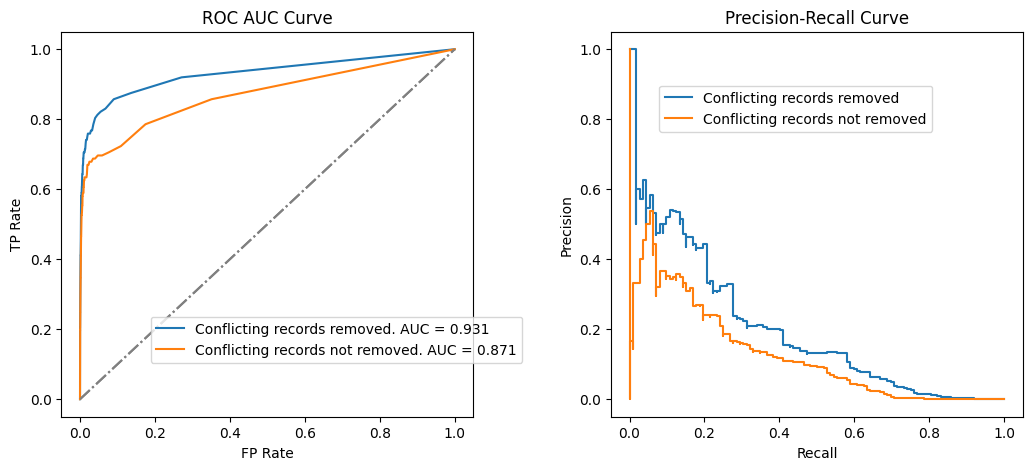

In [7]:
compare_cvs_filesuffixes = [
    '_for_experiment_participants_screened_single_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    '_for_experiment_participants_screened_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials'
]
legend = [
    'Conflicting records removed',
    'Conflicting records not removed'
]

compare_cvs(cv_analytics_utils, compare_cvs_filesuffixes, legend, filename='./experiment_graphs/screened_vs_single_first_5.png')

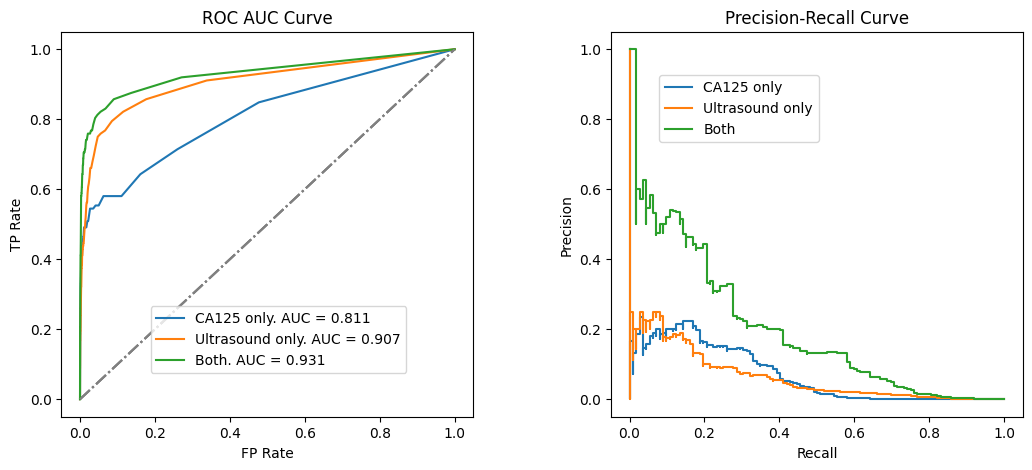

In [8]:
compare_cvs_filesuffixes = [
    '_for_experiment_participants_screened_ca125_single_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    '_for_experiment_participants_screened_ultra_single_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    '_for_experiment_participants_screened_single_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials'
]
legend = [
    'CA125 only',
    'Ultrasound only',
    'Both'
]

compare_cvs(cv_analytics_utils, compare_cvs_filesuffixes, legend, filename='./experiment_graphs/ca125_ultra_both.png')

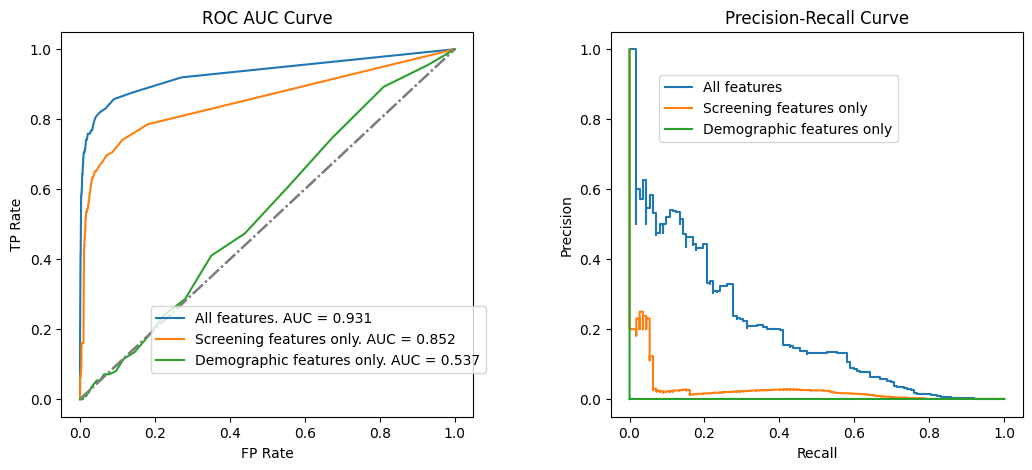

In [11]:
compare_cvs_filesuffixes = [
    '_for_experiment_participants_screened_single_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    '_for_experiment_participants_screened_cols_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    '_for_experiment_not_screened_cols_single_label_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials',
]
legend = [
    'All features',
    'Screening features only',
    'Demographic features only',
]

compare_cvs(cv_analytics_utils, compare_cvs_filesuffixes, legend, filename='./experiment_graphs/screening_vs_demographics.png')